In [112]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch

In [ ]:
from utils import MnistData
from models import ModelManager, ModelType

In [ ]:
model_loaded = ModelManager.get_trained(ModelType.MnistCnnPatt)
generator = ModelManager.get_untrained(ModelType.MnistGanGenerator)
discriminator = ModelManager.get_untrained(ModelType.MnistGanDiscriminator)

In [ ]:
data = MnistData()

In [ ]:
images = None

In [201]:
generator = ModelManager.get_untrained(ModelType.MnistGanGenerator)
discriminator = ModelManager.get_untrained(ModelType.MnistGanDiscriminator)

--- 0 ---


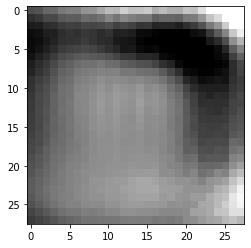

--- 1 ---


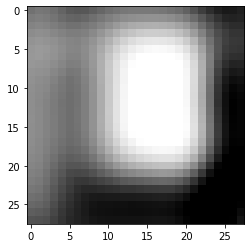

--- 2 ---


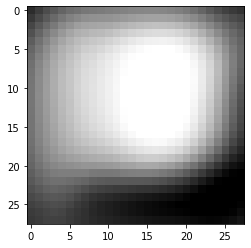

--- 3 ---


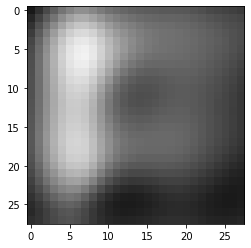

--- 4 ---


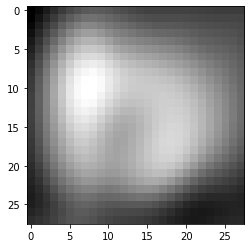

--- 5 ---


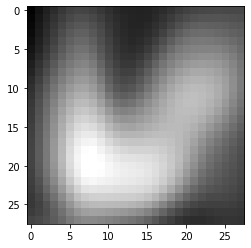

--- 6 ---


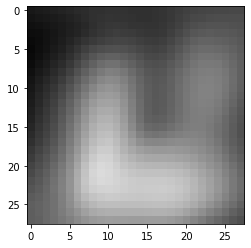

--- 7 ---


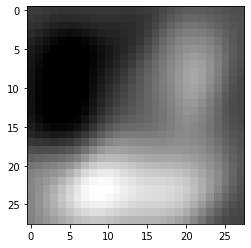

--- 8 ---


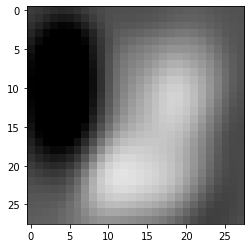

--- 9 ---


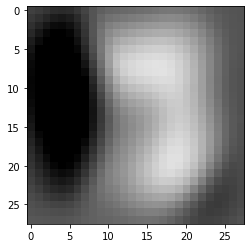

In [205]:
batch_size = 20
loss_fn = nn.BCELoss()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=1e-2)
generator_optimizer = optim.Adam(generator.parameters(), lr=1e-3)
batch, _ = data.get_training_batch(batch_size)
rand_batch = torch.rand((batch_size, 1, 28, 28))
images = batch
for epoch in range(100):
    batch, _ = data.get_training_batch(batch_size)
    rand_batch = torch.rand((batch_size, 1, 28, 28))
    images = generator(rand_batch)
    generator_optimizer.zero_grad()
    
    discriminator_optimizer.zero_grad()
    
    d_preds = discriminator(images)
    loss_one = ((discriminator(batch) + 1e-5).log().sum() + ((1 + 1e-5) - discriminator(generator(rand_batch))).log().sum()) / batch_size
    loss_one.backward(retain_graph=True)
    generator_optimizer.step()

    discriminator_optimizer.zero_grad()
    loss_two = - ((discriminator(batch) + 1e-5).log().sum() + ((1 + 1e-5) - discriminator(generator(rand_batch))).log().sum()) / batch_size
    loss_two.backward()
    discriminator_optimizer.step()
    
    #batch, _ = data.get_training_batch(batch_size)
    
    if epoch % 10 == 0:
        print(f'--- {epoch} ---')
        MnistData.display(images[0], scale=True)

In [204]:
discriminator(images), discriminator(batch)

(tensor([[0.0407],
         [0.0434]], grad_fn=<SigmoidBackward>),
 tensor([[0.9743],
         [0.9596]], grad_fn=<SigmoidBackward>))

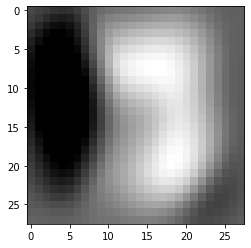

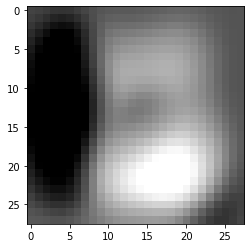

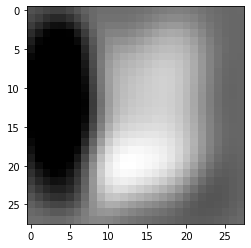

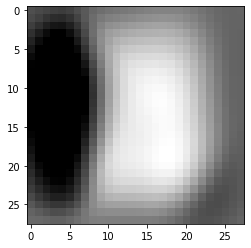

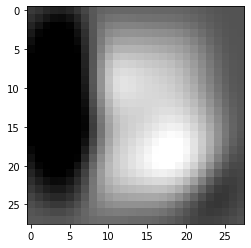

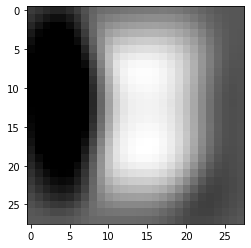

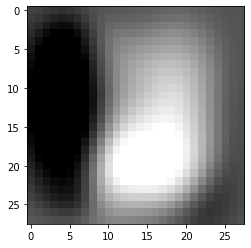

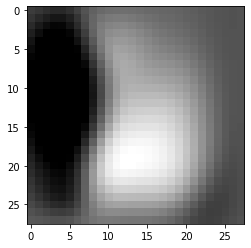

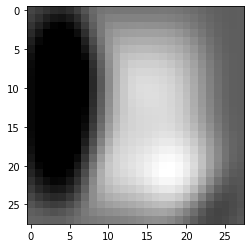

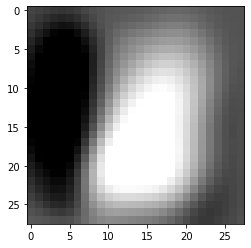

In [206]:
#images = generator(model_loaded(data.get_training_batch(batch_size)[0]) * 0.9)
for i in range(min(batch_size, 10)):
    MnistData.display(images[i])

In [ ]:
ModelManager.save_model(ModelType.MnistGanDiscriminator, discriminator)